# TP2 - SVM

### 1. Plan séparateur

In [2]:
import matplotlib.pyplot as plt
import numpy as np

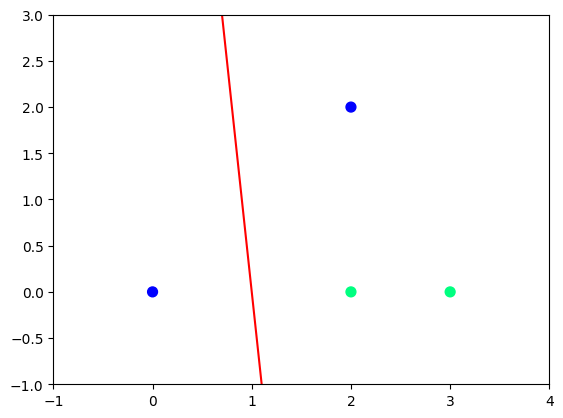

In [3]:
from TP2_ETU import aff_donnees, aff_plan

X = np.array([[0, 0],[2, 2],[2, 0],[3, 0]])
y = np.array([-1, -1, 1, 1])

boundx = [X[:,0].min() - 1, X[:,0].max() + 1]
boundy = [X[:,1].min() - 1, X[:,1].max() + 1]

# visualize data and decision boundary
aff_donnees(X, y, boundx, boundy, 50)
aff_plan([1,0.1], -1, boundx)

Cet hyperplan n'est pas séparateur.

### 2. SVM linéaire dans le primal

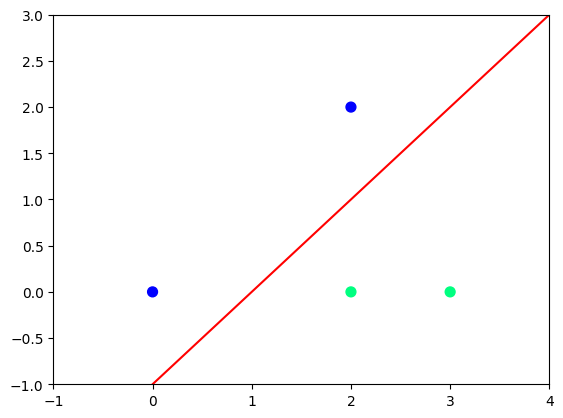

In [4]:
from TP2_ETU import Resoud_primal

w,b = Resoud_primal(X, y)

aff_donnees(X, y, boundx, boundy, 50)
aff_plan(w, b, boundx)

Cette fois l'hyperplan sépare bel et bien ces 4 points, et la marge est maximale.

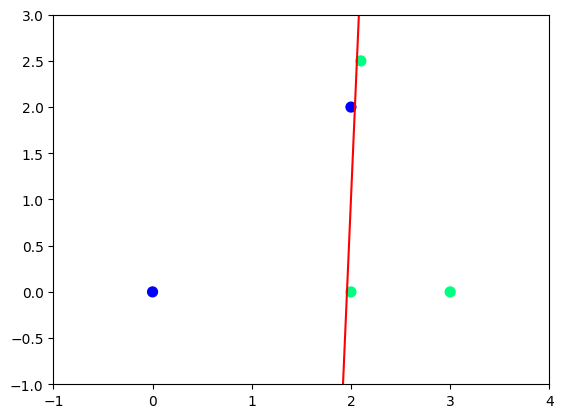

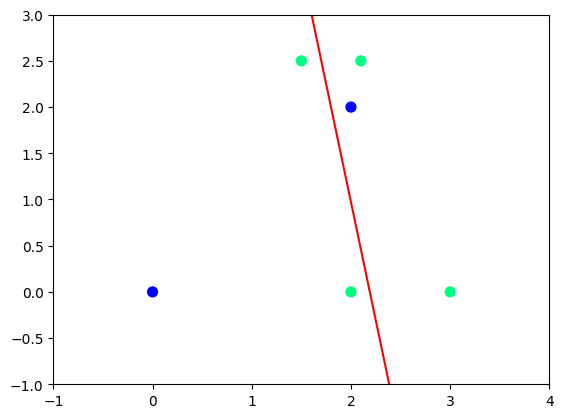

In [5]:
from TP2_ETU import Resoud_primal

X_bis = np.concatenate((X, [[2.1, 2.5]]), axis = 0)
y_bis = np.concatenate((y, [1]), axis = 0)

X_ter = np.concatenate((X_bis, [[1.5, 2.5]]), axis = 0)
y_ter = np.concatenate((y_bis, [1]), axis = 0)

# Resolve and show results
w,b = Resoud_primal(X_bis, y_bis)
plt.figure()
aff_donnees(X_bis, y_bis, boundx, boundy, 50)
aff_plan(w, b, boundx)

w, b = Resoud_primal(X_ter, y_ter)
plt.figure()
aff_donnees(X_ter, y_ter, boundx, boundy, 50)
aff_plan(w, b, boundx)

plt.show()


En ajoutant le point (2.1, 2.5), la solution reste réalisable, mais la marge optimale diminue fortement : le modèle devient très sensible.

En ajoutant le point (1.5, 2.5), les données ne sont plus linéairement séparables : le problème primal rigide n’a plus de solution faisable. On constate que la discrimination à même empirée, avec l'exemple `(2, 0)` dorénavant mal classé.

### 3. SVM à marge souple dans le primal

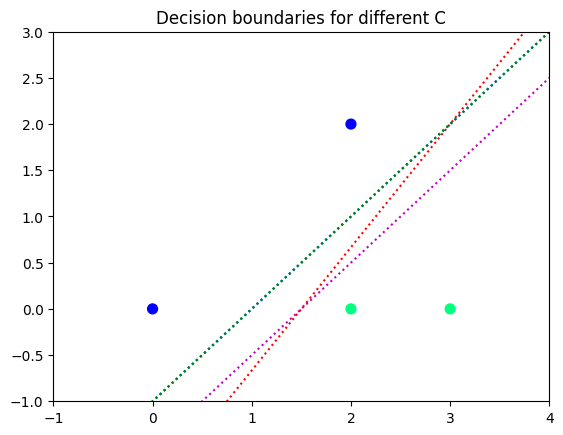

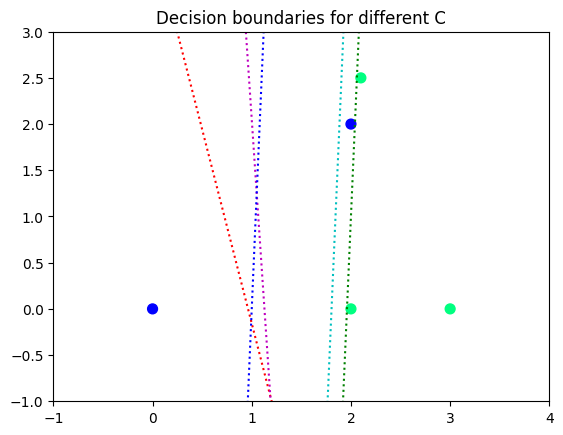

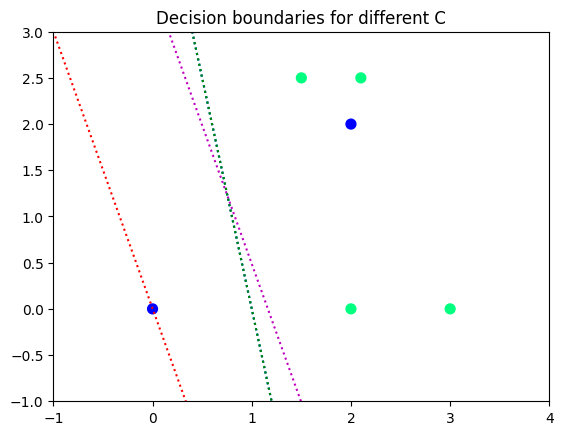

In [6]:
from TP2_ETU import Resoud_primal_souple, aff_donnees, aff_plan

# datasets
datasets = [(X, y), (X_bis, y_bis), (X_ter, y_ter)]

# C values to test
C_values = [0.25, 0.5, 1, 64, 512]

# Colors or linestyles for different C
colors = ['r', 'm', 'b', 'c', 'g']
linestyles = [':', ':', ':', ':', ':']

for ds in datasets:
    plt.figure()
    aff_donnees(ds[0], ds[1], boundx, boundy, 50)
    for i, c in enumerate(C_values):
        w, b, xi = Resoud_primal_souple(ds[0], ds[1], c)
        # pick color and linestyle cyclically
        color = colors[i % len(colors)]
        ls = linestyles[i % len(linestyles)]
        aff_plan(w, b, boundx, color=color, linestyle=ls)
        # print(f"C={c}: w={w}, b={b}")
    plt.title("Decision boundaries for different C")
    plt.show()


Le paramètre C contrôle le compromis entre largeur de la marge et respect strict  
des données d’entraînement :

Une petite valeur de C favorise une marge large en tolérant davantage de violations  
(outliers mal classés ou proches de la frontière).

Tandis que pour une grande valeur de C, le solver cherche à classer correctement  
tous les points, quitte à réduire la marge et risque l'overfitting.

### 4. SVM dans le dual

In [7]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

print(f"Coefficients:\n {model.dual_coef_}\n")
print(f"Vecteurs support:\n {model.support_vectors_}\n")
print(f"{model.support_}")


Coefficients:
 [[-0.5 -0.5  1. ]]

Vecteurs support:
 [[0. 0.]
 [2. 2.]
 [2. 0.]]

[0 1 2]


Les valeurs récupérées sont : [-0.5, -0.5, 1.0]

Ces valeurs sont identiques à celles trouvées dans l’exercice précédent (SVM linéaire dans le primal), ce qui confirme la cohérence entre la formulation duale et la formulation primale.


### 5. SVM avec Kernel


La fonction `aff_frontiere` permet de visualiser la fonction de décision du SVM en prédisant la classe de points générés en une grille. Cette méthode met en évidence les zones de décision et les frontières séparant les classes.

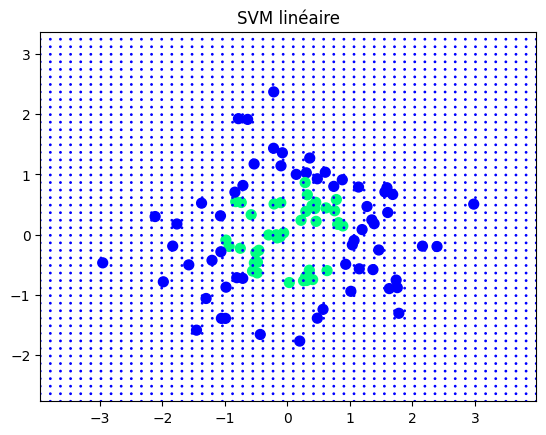

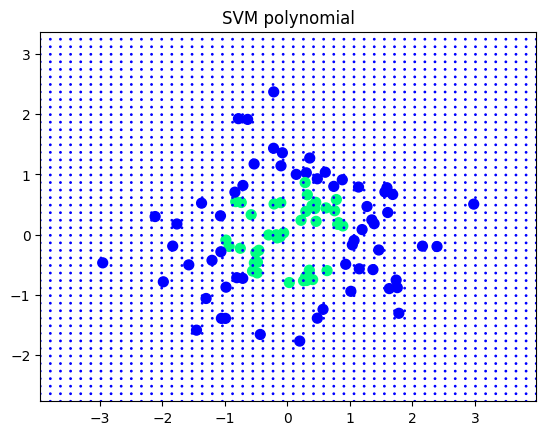

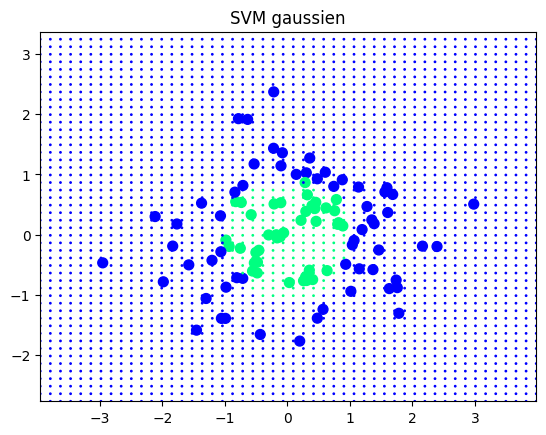

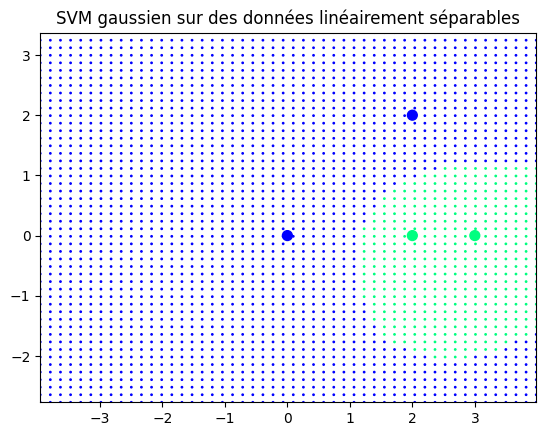

In [ ]:
from TP2_ETU import aff_frontiere

# Load data
data = np.load("TP2.npz")
X_train, y_train = (data[key] for key in ["arr_0", "arr_1"])
boundx = [X_train[:,0].min() - 1, X_train[:,0].max() + 1]
boundy = [X_train[:,1].min() - 1, X_train[:,1].max() + 1]


model_lin = svm.SVC(kernel='linear', C=1)
model_lin.fit(X_train, y_train)
plt.figure()
plt.title("SVM linéaire")
aff_frontiere(X_train, y_train, boundx, boundy, model_lin)

model_poly = svm.SVC(kernel='poly', C=1)
model_poly.fit(X_train, y_train)
plt.figure()
plt.title("SVM polynomial")
aff_frontiere(X_train, y_train, boundx, boundy, model_poly)

model_gaus = svm.SVC(kernel='rbf', C=1)
model_gaus.fit(X_train, y_train)
plt.figure()
plt.title("SVM gaussien")
aff_frontiere(X_train, y_train, boundx, boundy, model_gaus)

# model_sig = svm.SVC(kernel='sigmoid', C=1)
# model_sig.fit(X_train, y_train)
# plt.figure()
# plt.title("SVM sigmoid")
# aff_frontiere(X_train, y_train, boundx, boundy, model_sig)

model_gaus_bis = svm.SVC(kernel='rbf', C=1)
model_gaus_bis.fit(X, y)
plt.figure()
plt.title("SVM gaussien sur des données linéairement séparables")
aff_frontiere(X, y, boundx, boundy, model_gaus_bis)


L’utilisation d’un noyau linéaire produit des frontières rectiligne :  
le modèle ne peut donc pas apprendre de séparations non linéaires.  
Dans le cas du jeu de données chargé depuis TP2.npz, le noyau gaussien  
crée la frontière la plus adaptée.

Cependant, lorsqu’on applique ce même noyau à des données linéairement  
séparables, la frontière obtenue s’adapte trop aux points d’entraînement  
et perd en généralisation la où une droite aurait suffit.

Cela montre qu’un noyau trop flexible (comme le RBF) n’est pas toujours  
approprié, et qu’il est préférable d’utiliser un noyau linéaire lorsque  
la structure des données s’y prête.